In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
# For n-way ANOVA
from statsmodels.formula.api import ols      
# For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary Libraries
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
# read the data
df = pd.read_csv('Downloads/Machine Learning 1/Week -2/Drinks_Menu.csv')

In [4]:
df.head()

,Calories,Total Fat (g),Cholesterol (mg)
0,3,0.1,0
1,4,0.1,0
2,5,0.1,0
3,5,0.1,0
4,70,0.1,10


In [5]:
df.shape

(242, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Calories          242 non-null    int64  
 1    Total Fat (g)    242 non-null    float64
 2   Cholesterol (mg)  242 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.8 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Total Fat (g),242.0,2.904959,2.944376,0.0,0.2,2.5,4.50,15.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0


In [8]:
# check for null values
df.isnull().sum()

Calories            0
 Total Fat (g)      0
Cholesterol (mg)    0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

28

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned data back to CSV
df.to_csv('drinks_menu_clean.csv', index=False)


In [11]:
# Before scaling
min_before_scaling = df['Calories'].min()
max_before_scaling = df['Calories'].max()

# Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Calories']])

# After scaling
min_after_scaling = df_scaled.min()
max_after_scaling = df_scaled.max()

print(f"Minimum before scaling: {min_before_scaling}")
print(f"Maximum before scaling: {max_before_scaling}")
print(f"Minimum after scaling: {min_after_scaling}")
print(f"Maximum after scaling: {max_after_scaling}")

Minimum before scaling: 0
Maximum before scaling: 510
Minimum after scaling: -1.9905495546269594
Maximum after scaling: 3.037537986558181


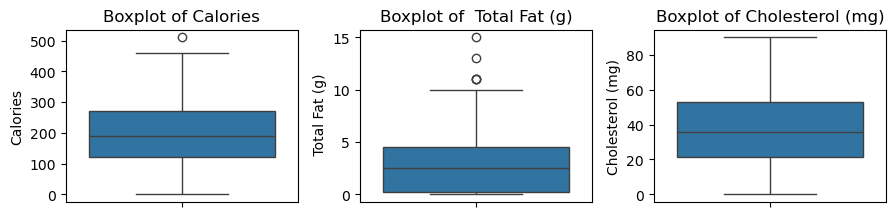

In [13]:
plt.figure(figsize=(12,8))
feature_list=df.columns
for i in range(len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[feature_list[i]],data=df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [14]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [15]:
for i in feature_list:
    LL,UL=remove_outlier(df[i])
    df[i]=np.where(df[i]>UL,UL,df[i])
    df[i]=np.where(df[i]<LL,LL,df[i])

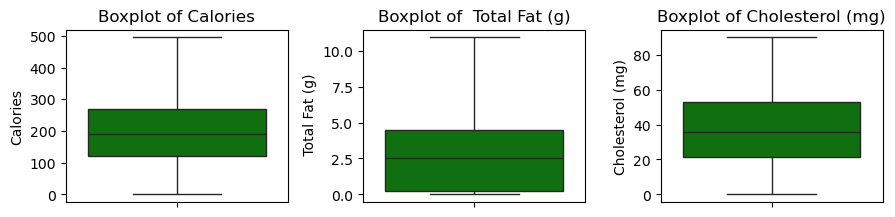

In [16]:
plt.figure(figsize=(12,8))
feature_list=df.columns
for i in range(len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[feature_list[i]],data=df, color = 'green')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [18]:
#Scale the data
from scipy.stats import zscore
df_scaled = df.apply(zscore)

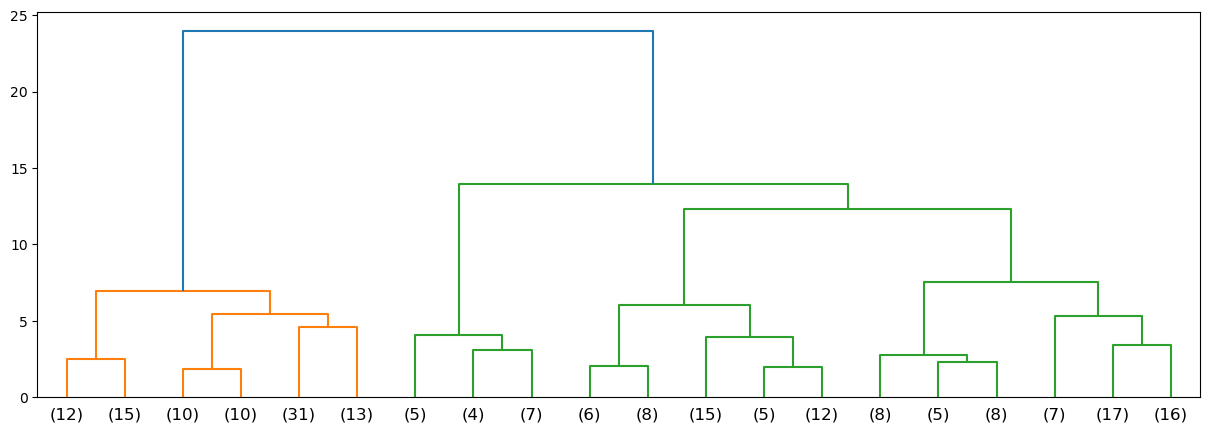

In [19]:
wardlink = linkage(df_scaled, method='ward',)
plt.figure(figsize = (15,5))
dend=dendrogram(wardlink,truncate_mode='lastp',p = 20,)

In [20]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(df_scaled)
k_means.inertia_

220.66231638505766

In [22]:
# Getting Silhouette Score clusters from 2 to 14

ss={1:0}
for i in range(2, 15):
    clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y=clusterer.fit_predict(df_scaled) # The higher (up to 1) the better
    s =silhouette_score(df_scaled, y )
    ss[i]=round(s,5) 
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.55325
The Average Silhouette Score for 3 clusters is 0.65963
The Average Silhouette Score for 4 clusters is 0.54115
The Average Silhouette Score for 5 clusters is 0.44346
The Average Silhouette Score for 6 clusters is 0.31327
The Average Silhouette Score for 7 clusters is 0.33105
The Average Silhouette Score for 8 clusters is 0.33561
The Average Silhouette Score for 9 clusters is 0.35455
The Average Silhouette Score for 10 clusters is 0.33859
The Average Silhouette Score for 11 clusters is 0.34143
The Average Silhouette Score for 12 clusters is 0.32586
The Average Silhouette Score for 13 clusters is 0.33228
The Average Silhouette Score for 14 clusters is 0.34292


In [21]:
from sklearn.datasets import make_blobs
# Generate synthetic data
df_scaled, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)

# WCSS is the sum of squared distance between each point and its centroid
wcss = kmeans.inertia_

print(f"Within Cluster Sum of Squares: {wcss}")

Within Cluster Sum of Squares: 212.355503489229


In [49]:
# Assuming X is your data and you want to evaluate the silhouette score for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(df_scaled)

# The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"The average silhouette score for 3 clusters is: {silhouette_avg}")

The average silhouette score for 3 clusters is: 0.6596332095691734
